<a href="https://colab.research.google.com/github/datagrad/Kamal-Thesis-Work/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:

# Load the dataset

# Load the dataset
url = "https://raw.githubusercontent.com/datagrad/MS_Reference_MS-DS-LJMU-C13/main/city_day.csv"
data = pd.read_csv(url)

# Display basic information about the dataset
data_info = data.info()

# Display the first few rows of the dataset
data_head = data.head()

# Check for missing values in the dataset
missing_values = data.isnull().sum()

data_info, data_head, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


(None,
         City      Date   PM2.5    PM10     NO    NO2     NOx    NH3     CO  \
 0  Ahmedabad  1/1/2015     NaN     NaN   0.92  18.22   17.15    NaN   0.92   
 1  Bengaluru  1/1/2015     NaN     NaN   3.26  17.33   10.88  20.36   0.33   
 2    Chennai  1/1/2015     NaN     NaN  16.30  15.39   22.68   4.59   1.17   
 3      Delhi  1/1/2015  313.22  607.98  69.16  36.39  110.59  33.85  15.20   
 4    Lucknow  1/1/2015     NaN     NaN   2.11  13.46    4.57    NaN  12.15   
 
       SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
 0   27.64  133.36     0.00     0.02    0.00    NaN        NaN  
 1    3.54   10.73     0.56     4.64     NaN    NaN        NaN  
 2    9.20   11.35     0.17      NaN     NaN    NaN        NaN  
 3    9.25   41.68    14.36    24.86    9.84  472.0     Severe  
 4  169.57   25.92     1.35     3.93     NaN    NaN        NaN  ,
 City              0
 Date              0
 PM2.5          4598
 PM10          11140
 NO             3582
 NO2            3585


In [3]:
# Step 1: Handling Date-Time Data

# Convert 'Date' to DateTime type and set it as the index
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.set_index('Date', inplace=True)

# Sorting the data based on Date
data.sort_index(inplace=True)

# Step 2: Handling Missing Data

# Given the significant number of missing values, let's use a combination of forward-fill and backward-fill
# Forward-fill will propagate the last valid non-null value down
# Backward-fill will propagate the next valid non-null value up
data_filled = data.fillna(method='ffill').fillna(method='bfill')

# Verify if there are any remaining missing values
remaining_missing_values = data_filled.isnull().sum()

# Display the preprocessed data and remaining missing values
data_filled.head(), remaining_missing_values


(                 City   PM2.5    PM10     NO    NO2     NOx    NH3     CO  \
 Date                                                                        
 2015-01-01  Ahmedabad  313.22  607.98   0.92  18.22   17.15  20.36   0.92   
 2015-01-01  Bengaluru  313.22  607.98   3.26  17.33   10.88  20.36   0.33   
 2015-01-01    Chennai  313.22  607.98  16.30  15.39   22.68   4.59   1.17   
 2015-01-01      Delhi  313.22  607.98  69.16  36.39  110.59  33.85  15.20   
 2015-01-01    Lucknow  313.22  607.98   2.11  13.46    4.57  33.85  12.15   
 
                SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
 Date                                                                    
 2015-01-01   27.64  133.36     0.00     0.02    0.00  472.0     Severe  
 2015-01-01    3.54   10.73     0.56     4.64    0.00  472.0     Severe  
 2015-01-01    9.20   11.35     0.17     4.64    0.00  472.0     Severe  
 2015-01-01    9.25   41.68    14.36    24.86    9.84  472.0     Severe  
 2015-01

<ipython-input-4-ab85c15e7e71>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data_filled.groupby(['City', 'Date']).mean().reset_index()
<ipython-input-4-ab85c15e7e71>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = daily_data.groupby('City').resample('M').mean()
<ipython-input-4-ab85c15e7e71>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = daily_data.groupby('City').resa

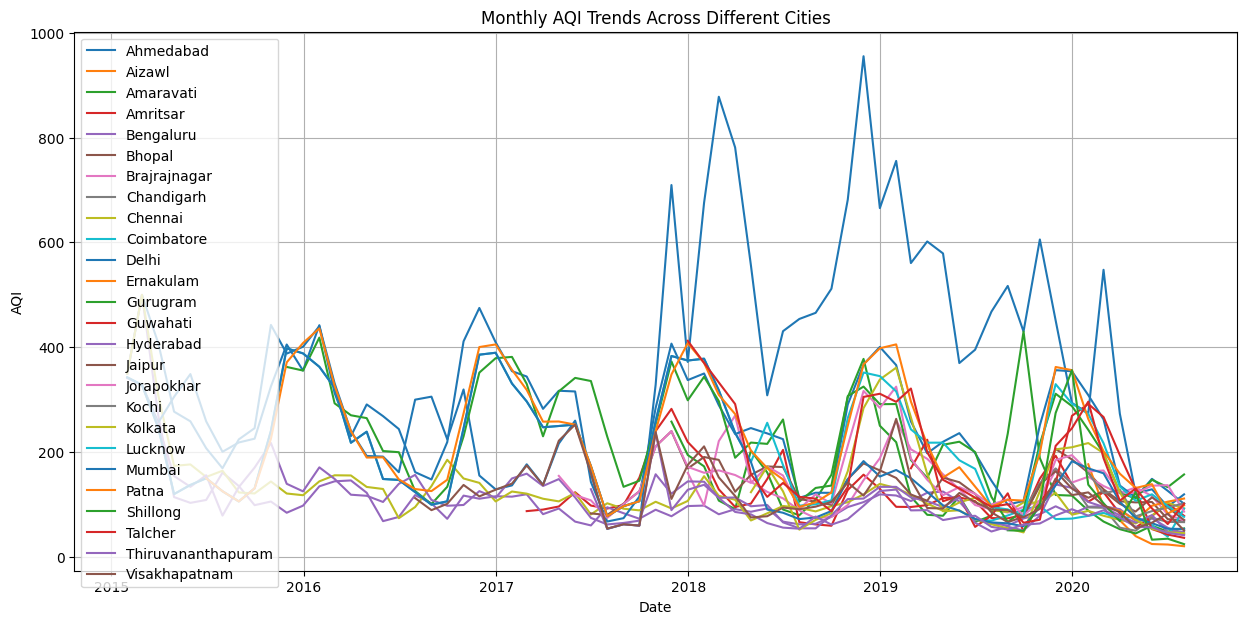

In [4]:
# Grouping data by City and Date to calculate mean values for each day (if there are multiple entries per day)
daily_data = data_filled.groupby(['City', 'Date']).mean().reset_index()

# Setting Date as index again and resampling to monthly frequency for smoother visualization
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)
monthly_data = daily_data.groupby('City').resample('M').mean()

# Plotting AQI trends for different cities
plt.figure(figsize=(15, 7))
for city in daily_data['City'].unique():
    plt.plot(monthly_data.loc[city, 'AQI'], label=city)

plt.title('Monthly AQI Trends Across Different Cities')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


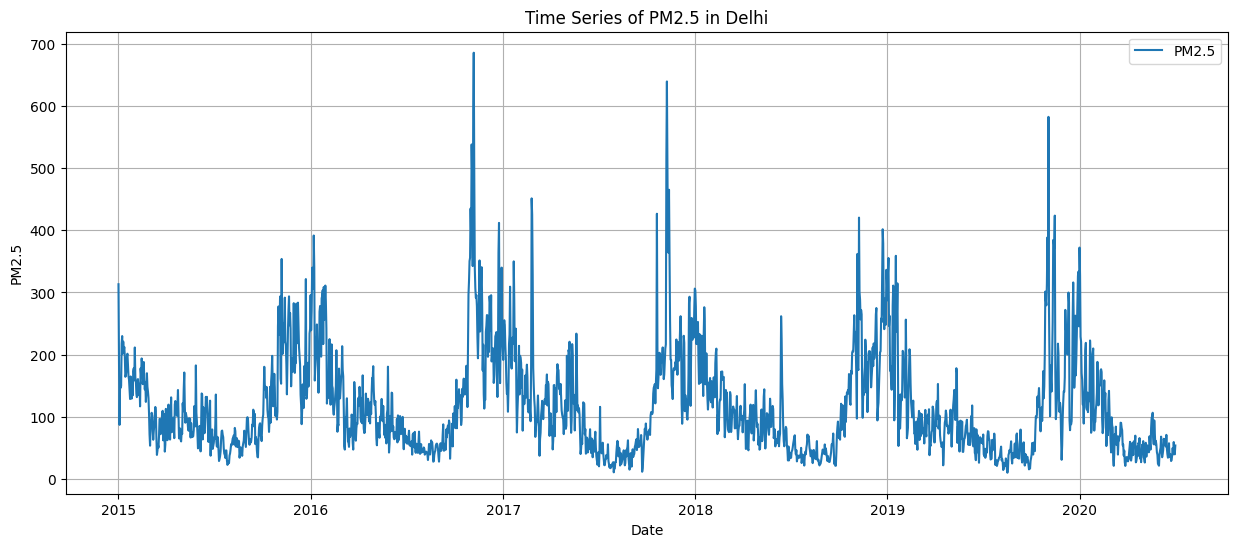

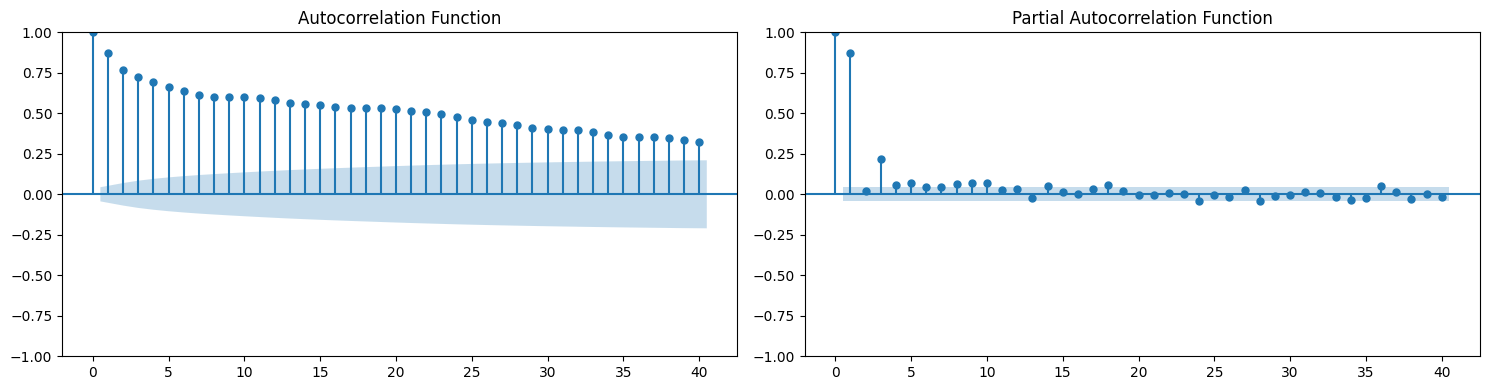

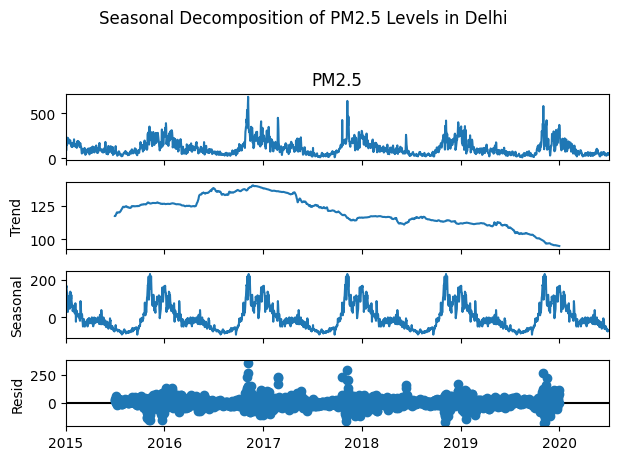

Test Statistic                   -3.980946
p-value                           0.001514
#Lags Used                       17.000000
Number of Observations Used    1991.000000
dtype: float64

In [5]:


# Step 1: Extract Delhi Data and PM2.5 variable
delhi_data = data_filled[data_filled['City'] == 'Delhi'].copy()
pm25_delhi = delhi_data['PM2.5']

# Step 2: Visual Inspection
plt.figure(figsize=(15, 6))
plt.plot(pm25_delhi, label='PM2.5')
plt.title('Time Series of PM2.5 in Delhi')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Checking for Stationarity
adf_result = adfuller(pm25_delhi.dropna())
adf_summary = pd.Series(adf_result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

# Step 4: Autocorrelation Analysis
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(pm25_delhi.dropna(), lags=40, ax=ax[0])
plot_pacf(pm25_delhi.dropna(), lags=40, ax=ax[1])
ax[0].set_title('Autocorrelation Function')
ax[1].set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# Step 5: Preliminary Decomposition
decomposition = seasonal_decompose(pm25_delhi, period=365)  # Assuming yearly seasonality as a start
decomposition.plot()
plt.suptitle('Seasonal Decomposition of PM2.5 Levels in Delhi')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting layout to prevent overlap with suptitle
plt.show()

# Display ADF results
adf_summary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


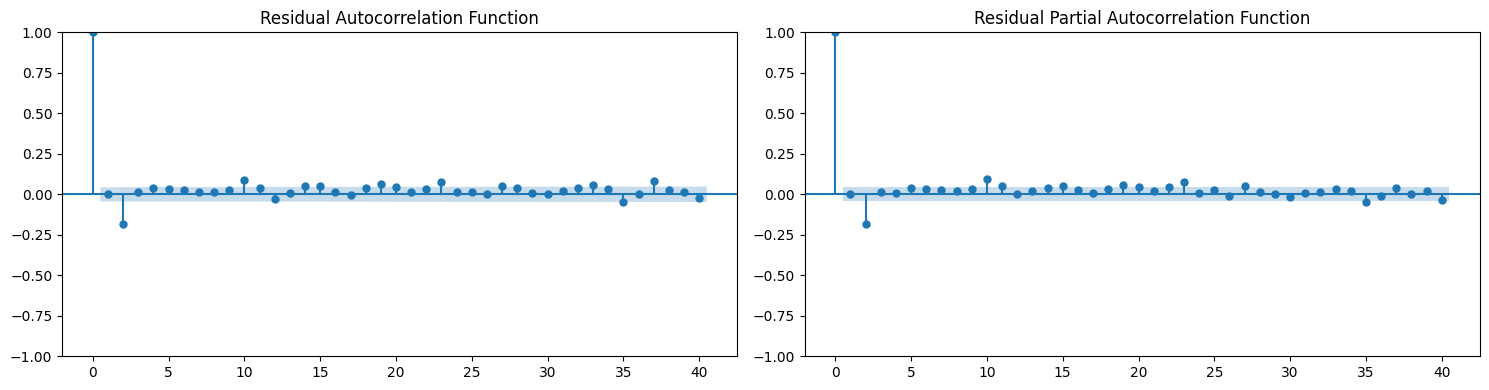

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              PM2.5   No. Observations:                 2009
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood              -10156.393
Date:                            Wed, 04 Oct 2023   AIC                          20322.785
Time:                                    11:29:10   BIC                          20350.747
Sample:                                01-01-2015   HQIC                         20333.057
                                     - 07-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8712      0.007    117.797      0.000       0.857       0.886
ma.L1         -0.0221      0.014     -1.593      0.111      -0.049       0.005
ar.S.L12       0.0684      0.018      3.791      0.000       0.033       0.104
ma.S.L12      -1.0088      0.011    -95.784      0.000      -1.029      -0.988
sigma2      1582.3108     30.284     52.249      0.000    1522.955    1641.666
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              9347.66
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
import statsmodels.api as sm

# Initial parameters
p, d, q = 1, 0, 1  # Non-seasonal parameters
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters

# Fitting a SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(pm25_delhi,
                                         order=(p, d, q),
                                         seasonal_order=(P, D, Q, s),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit(disp=False)

# Diagnosing residuals
residuals = sarima_model.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(residuals, lags=40, ax=ax[0])
plot_pacf(residuals, lags=40, ax=ax[1])
ax[0].set_title('Residual Autocorrelation Function')
ax[1].set_title('Residual Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# Displaying summary of the SARIMA model
sarima_model.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


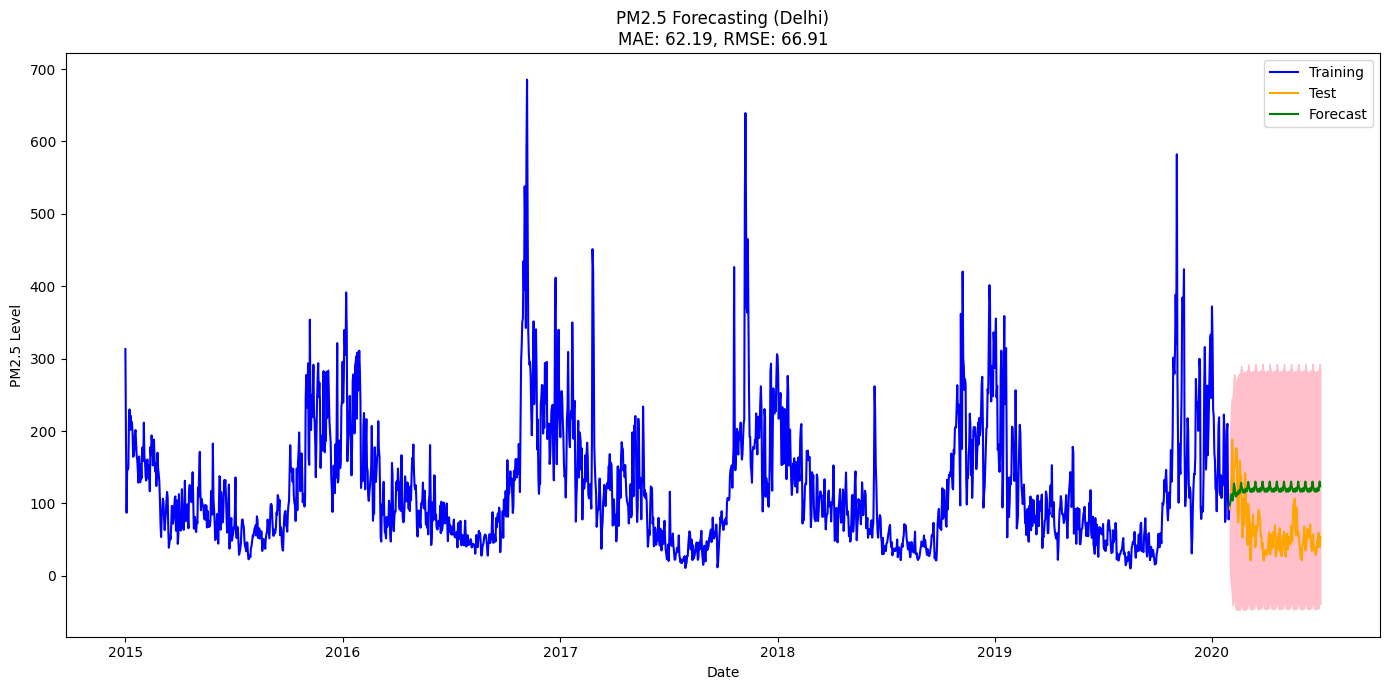

(62.18502960161432, 66.91422017331472)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Splitting the data into training and test sets (6 months for testing)
train = pm25_delhi.loc[:'2020-01-30']
test = pm25_delhi.loc['2020-01-31':]

# Fitting the SARIMAX model with the previously identified parameters
model = sm.tsa.statespace.SARIMAX(train,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit(disp=False)

# Forecasting PM2.5 levels for the test set period
forecast = results.get_forecast(steps=len(test))
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Calculating error metrics
mae = mean_absolute_error(test, mean_forecast)
rmse = np.sqrt(mean_squared_error(test, mean_forecast))

# Plotting the training data, test data, and forecast
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(mean_forecast.index, mean_forecast, label='Forecast', color='green')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.legend()
plt.title('PM2.5 Forecasting (Delhi)\nMAE: {:.2f}, RMSE: {:.2f}'.format(mae, rmse))
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.tight_layout()
plt.show()

# Display error metrics
(mae, rmse)
